In [256]:
import pandas as pd
import seaborn as sb
import numpy as np
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

In [257]:
data=pd.read_csv("loan.csv")
data7=pd.read_csv("loan.csv")

In [258]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [259]:
data.head(100)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
96,LP001327,Female,Yes,0,Graduate,No,2484,2302.0,137.0,360.0,1.0,Semiurban,Y
97,LP001333,Male,Yes,0,Graduate,No,1977,997.0,50.0,360.0,1.0,Semiurban,Y
98,LP001334,Male,Yes,0,Not Graduate,No,4188,0.0,115.0,180.0,1.0,Semiurban,Y


In [260]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


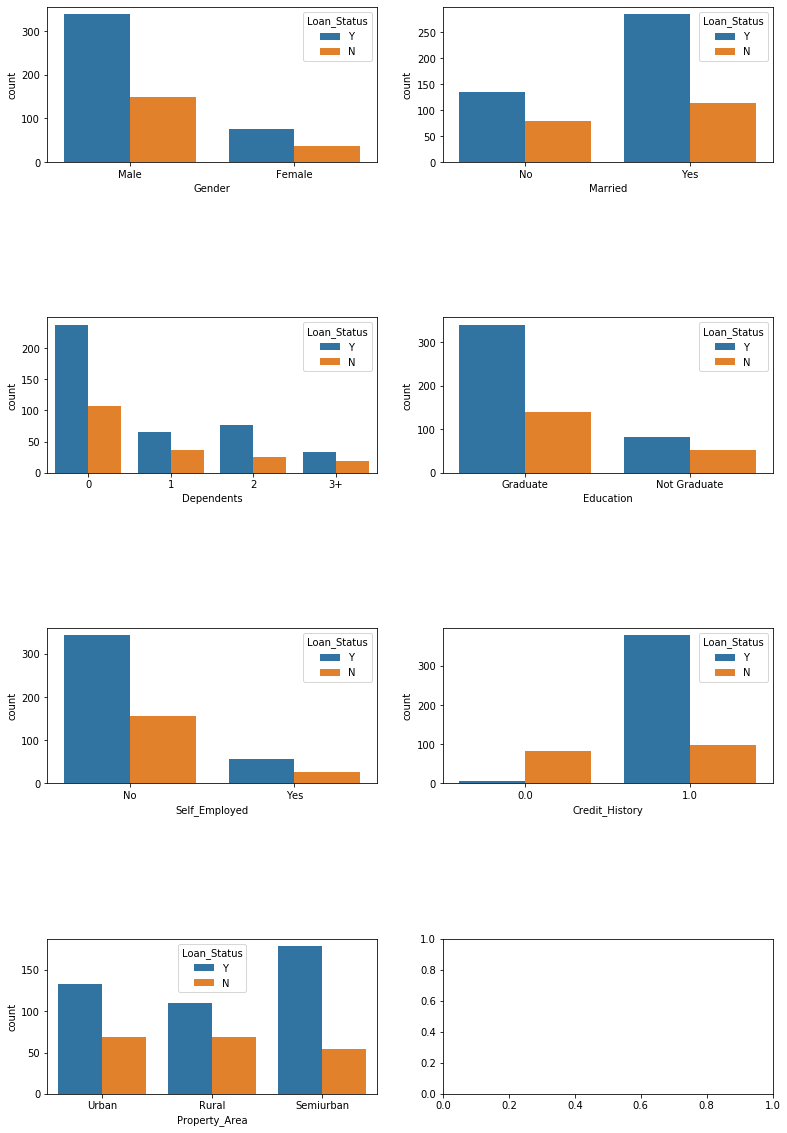

In [261]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(4,2,figsize=(13,20))
for id,i in enumerate(data[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Credit_History','Property_Area']]):
    row,col = id//2,id%2
    sb.countplot(x=i,data=data,hue='Loan_Status',ax=axes[row,col])
plt.subplots_adjust(hspace=1)

In [262]:
l=data7.groupby(data.Dependents)
l.count()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Dependents,,,,,,,,,,,,,
0,345,338,345,345,345,326,345,345,334,334,316,345,345
1,102,101,102,102,102,96,102,102,98,101,90,102,102
2,101,99,101,101,101,96,101,101,98,101,95,101,101
3+,51,48,51,51,51,49,51,51,49,50,48,51,51


In [263]:
print((294/511*100),"% total applicats are with 0 -dependents")
print((85/511*100),"% total applicats are with 1 -dependents")    
print((88/511*100),"% total applicats are with 2 -dependents")
print(44/511*100,"% total applicats are with 3+ -dependents")

57.534246575342465 % total applicats are with 0 -dependents
16.634050880626223 % total applicats are with 1 -dependents
17.22113502935421 % total applicats are with 2 -dependents
8.610567514677104 % total applicats are with 3+ -dependents


In [264]:
# data7.groupby(data.Application_Status).count()
data.groupby(['Self_Employed','Loan_Status']).count()

Loan_ID  Gender  Married  Dependents  Education  \
Self_Employed Loan_Status                                                    
No            N                157     152      157         152        157   
              Y                343     339      340         335        343   
Yes           N                 26      26       26          25         26   
              Y                 56      52       56          55         56   

                           ApplicantIncome  CoapplicantIncome  LoanAmount  \
Self_Employed Loan_Status                                                   
No            N                        157                157         148   
              Y                        343                343         334   
Yes           N                         26                 26          25   
              Y                         56                 56          54   

                           Loan_Amount_Term  Credit_History  Property_Area  
Self_Employed Loan_Status                                                   
No            N                         151             150            157  
              Y                         338             313            343  
Yes           N                          26              25             26  
              Y                          54              50             56

In [265]:
print(46/511*100)

9.001956947162427


In [266]:
data.groupby(['Married','Gender','Loan_Status']).count()

Loan_ID  Dependents  Education  Self_Employed  \
Married Gender Loan_Status                                                  
No      Female N                 29          28         29             27   
               Y                 51          50         51             47   
        Male   N                 49          48         49             47   
               Y                 81          80         81             75   
Yes     Female N                  8           8          8              8   
               Y                 23          23         23             21   
        Male   N                101          97        101             96   
               Y                256         252        256            245   

                            ApplicantIncome  CoapplicantIncome  LoanAmount  \
Married Gender Loan_Status                                                   
No      Female N                         29                 29          28   
               Y                         51                 51          50   
        Male   N                         49                 49          46   
               Y                         81                 81          79   
Yes     Female N                          8                  8           8   
               Y                         23                 23          23   
        Male   N                        101                101          94   
               Y                        256                256         249   

                            Loan_Amount_Term  Credit_History  Property_Area  
Married Gender Loan_Status                                                   
No      Female N                          28              28             29  
               Y                          49              45             51  
        Male   N                          48              45             49  
               Y                          80              78             81  
Yes     Female N                           8               8              8  
               Y                          23              19             23  
        Male   N                          97              93            101  
               Y                         251             233            256

In [267]:
print(87/511*100)

17.025440313111545


In [268]:
data.groupby(['Property_Area','Loan_Status']).count()

Loan_ID  Gender  Married  Dependents  Education  \
Property_Area Loan_Status                                                    
Rural         N                 69      67       69          68         69   
              Y                110     108      110         109        110   
Semiurban     N                 54      52       54          52         54   
              Y                179     175      177         175        179   
Urban         N                 69      68       69          66         69   
              Y                133     131      132         129        133   

                           Self_Employed  ApplicantIncome  CoapplicantIncome  \
Property_Area Loan_Status                                                      
Rural         N                       66               69                 69   
              Y                      103              110                110   
Semiurban     N                       52               54                 54   
              Y                      171              179                179   
Urban         N                       65               69                 69   
              Y                      125              133                133   

                           LoanAmount  Loan_Amount_Term  Credit_History  
Property_Area Loan_Status                                                
Rural         N                    66                67              65  
              Y                   107               108             100  
Semiurban     N                    53                53              49  
              Y                   175               177             168  
Urban         N                    62                66              65  
              Y                   129               129             117

In [269]:
data7.groupby(['Dependents']).count()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Dependents,,,,,,,,,,,,
0,345,338,345,345,326,345,345,334,334,316,345,345
1,102,101,102,102,96,102,102,98,101,90,102,102
2,101,99,101,101,96,101,101,98,101,95,101,101
3+,51,48,51,51,49,51,51,49,50,48,51,51


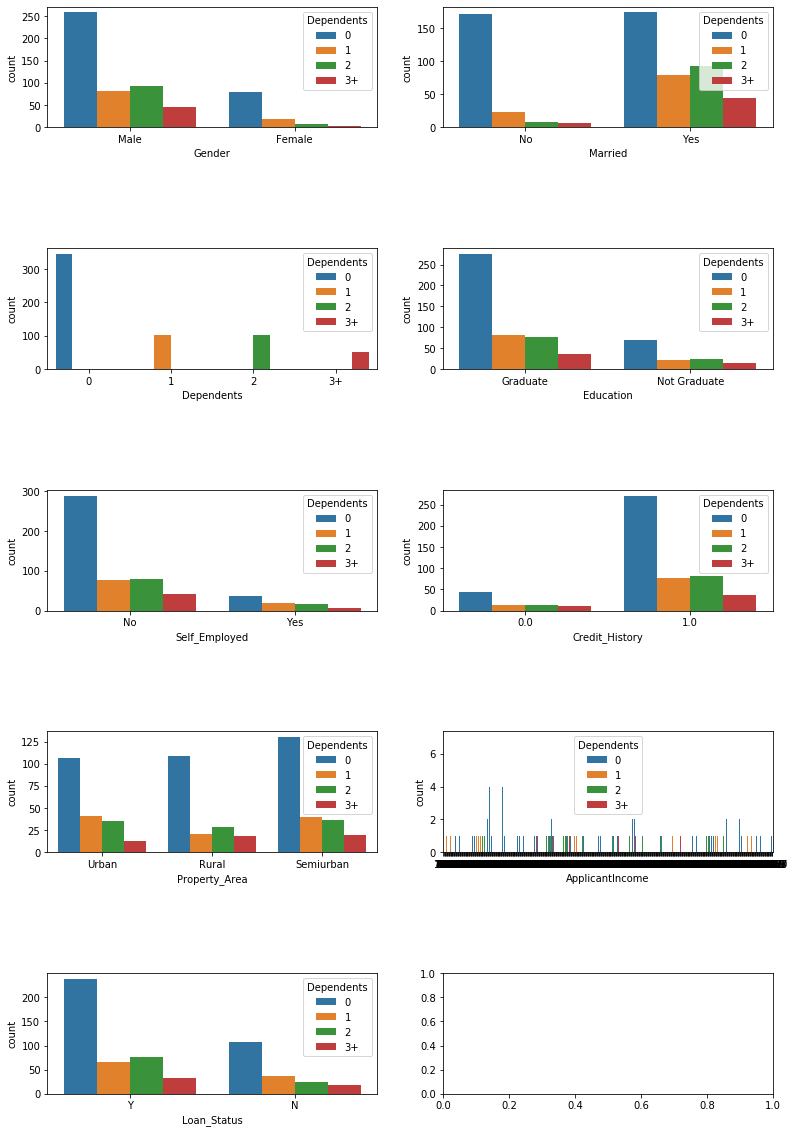

In [270]:
fig,axes = plt.subplots(5,2,figsize=(13,20))
for id,i in enumerate(data[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Credit_History','Property_Area', 'ApplicantIncome','Loan_Status']]):
    row,col = id//2,id%2
    sb.countplot(x=i,data=data,hue='Dependents',ax=axes[row,col])
plt.subplots_adjust(hspace=1)


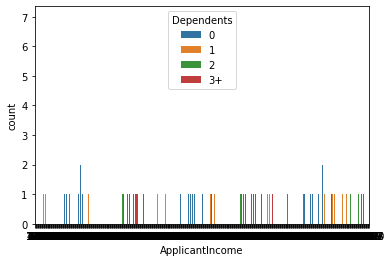

In [271]:
sb.countplot(hue=data.Dependents,x=data.ApplicantIncome)

In [272]:
data.groupby(['ApplicantIncome']).count()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
ApplicantIncome,,,,,,,,,,,,
150,1,1,1,1,1,1,1,1,1,1,1,1
210,1,1,1,1,1,0,1,1,1,1,1,1
416,1,1,1,1,1,0,1,1,1,0,1,1
645,1,1,1,1,1,1,1,1,1,1,1,1
674,1,0,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
39147,1,1,1,1,1,1,1,1,1,1,1,1
39999,1,1,1,1,1,1,1,1,1,1,1,1
51763,1,0,1,1,1,1,1,1,1,1,1,1


In [273]:
data7.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [274]:
data7.drop(['Loan_ID'],axis=1,inplace=True)

In [275]:
data7.drop(['Dependents'],axis=1,inplace=True)

In [276]:
df1=data7.copy()
df2=data7.copy()
dfinplace=data7.copy()
df1
df2
dfinplace

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [277]:
import numpy as np
df3=df1.replace(np.NAN,0)
df3

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban,Y
1,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [278]:
df3.isnull().sum()

Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [279]:
df3

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban,Y
1,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [280]:
df1

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [281]:
from sklearn.preprocessing import LabelEncoder
all= LabelEncoder()
    
list1=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']
for val in list1:
    data7[val]=all.fit_transform(data[val].astype(str))

In [282]:
data7.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [283]:
data7.columns

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [284]:
df1=data7.copy()
df2=data7.copy()
dfinplace=data7.copy()
df1
df2
dfinplace

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [285]:
import numpy as np
df3=df1.replace(np.NAN,0)
df3

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,5849,0.0,0.0,360.0,1.0,2,1
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [286]:
df3.isnull().sum()

Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [287]:
x=df3[['Gender', 'Married', 'Education', 'Self_Employed','Credit_History','Property_Area', 'ApplicantIncome']]
y=df3.Loan_Status
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y, test_size=0.2, random_state=7)

In [288]:
model = LogisticRegression()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.8130081300813008


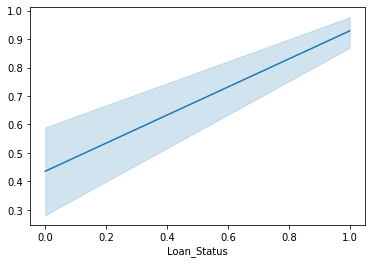

In [289]:
sb.lineplot(x=y_test,y=predictions)

In [290]:
from sklearn.metrics import confusion_matrix #confusuon matrix
pd.crosstab(y_test, predictions)
#positive=1 : application accepted

col_0,0,1
Loan_Status,,
0,22,17
1,6,78


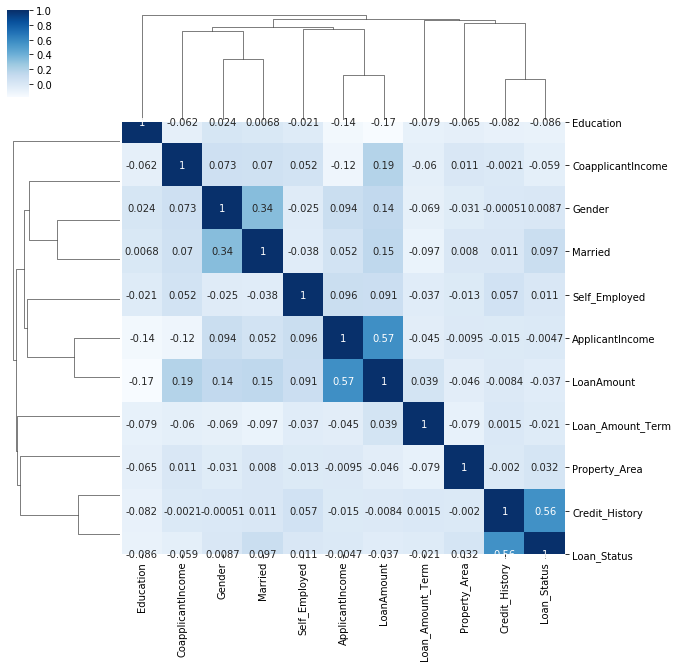

In [291]:
sb.clustermap(data7.corr(),cmap='Blues',annot=True)
#credit history is correlated with application status

In [292]:
X_train=df3[['Gender', 'Married', 'Education', 'Self_Employed','Credit_History','Property_Area', 'ApplicantIncome']]
Y_train=df3.Loan_Status

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.3,
                                                    random_state=10)

In [293]:
#Using Logistic Regression Algorithm to the Training Set
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(random_state = 0)
classifier1.fit(X_train, Y_train)
#Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier2.fit(X_train, Y_train)
#Using SVC method of svm class to use Support Vector Machine Algorithm
from sklearn.svm import SVC
classifier3 = SVC(kernel = 'linear', random_state = 0)
classifier3.fit(X_train, Y_train)
# Using SVC method of svm class to use Kernel SVM Algorithm
from sklearn.svm import SVC
classifier4 = SVC(kernel = 'rbf', random_state = 1)
classifier4.fit(X_train, Y_train)
#Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
classifier5 = GaussianNB()
classifier5.fit(X_train, Y_train)
#Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm

from sklearn.tree import DecisionTreeClassifier
classifier6 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier6.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [294]:
Y_pred1 = classifier1.predict(X_test)
Y_pred2 = classifier2.predict(X_test)
Y_pred3 = classifier3.predict(X_test)
Y_pred4 = classifier4.predict(X_test)
Y_pred5= classifier5.predict(X_test)
Y_pred6 = classifier6.predict(X_test)

In [295]:
print(accuracy_score(Y_test, Y_pred1))
print(accuracy_score(Y_test, Y_pred2))
print(accuracy_score(Y_test, Y_pred3))
print(accuracy_score(Y_test, Y_pred4))
print(accuracy_score(Y_test, Y_pred5))
print(accuracy_score(Y_test, Y_pred6))

0.7621621621621621
0.6432432432432432
0.7513513513513513
0.7189189189189189
0.7567567567567568
0.7027027027027027


In [296]:
from sklearn.externals import joblib
joblib.dump(model,"Loan_Prediction.pkl")

['Loan_Prediction.pkl']